## Exploratory Analysis of Spotify Songs Dataset


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.graphics.api as smg
import statsmodels.api as sm

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

### Loading the data:


In [4]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


##### I will be dropping Track ID column as it doesn't add much to the dataset.

In [5]:
df.drop(columns=['track_id'])

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


##### Getting the shape of the data, the number of features and observations:

In [6]:
df.shape

(232725, 18)

###### Checking if there are any missing values in the data:

In [6]:
df.isnull().values.any()

False

In [9]:
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


##### Checking types of data in the dataset:

In [7]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [8]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


##### Looking at the numerical values in the dataset:


In [8]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


#### Looking at distribution across numerical data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c2f5630>,
      dtype=object)

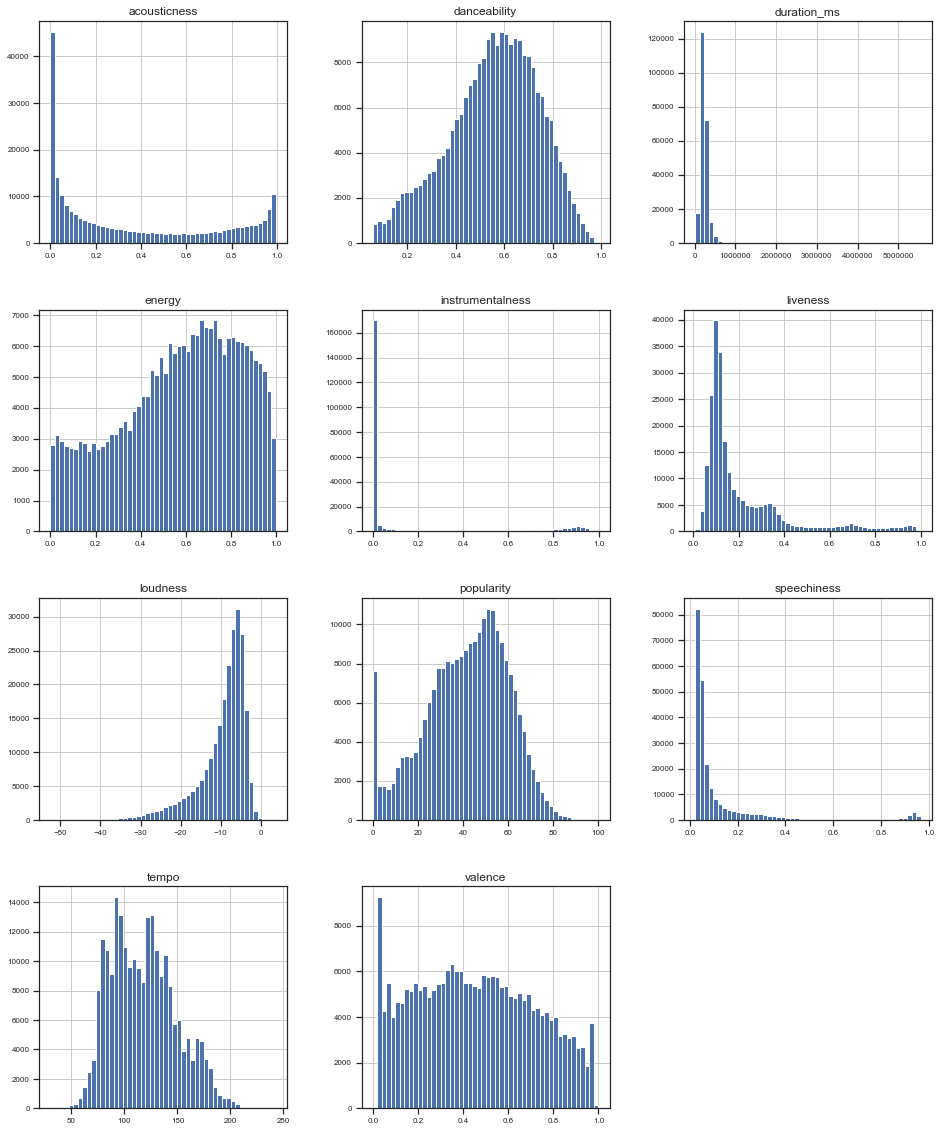

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decoratio

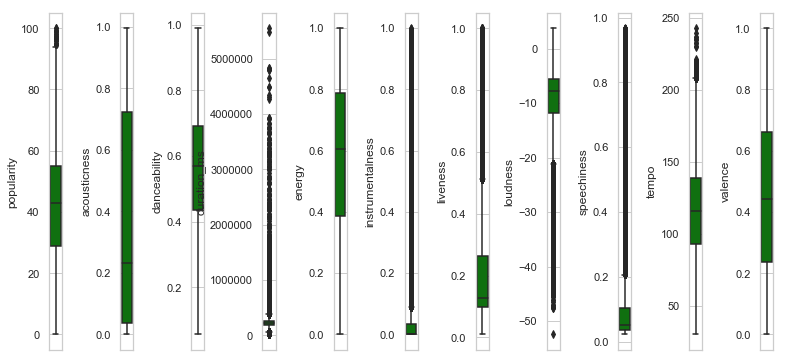

In [51]:
l = df_num.columns.values
number_of_columns=11
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_num[l[i]],color='green',orient='v')
    plt.tight_layout()

In [62]:
sample_data = df.sample(n = 500)
sample_data_num = sample_data.select_dtypes(include = ['float64', 'int64'])

/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decoratio

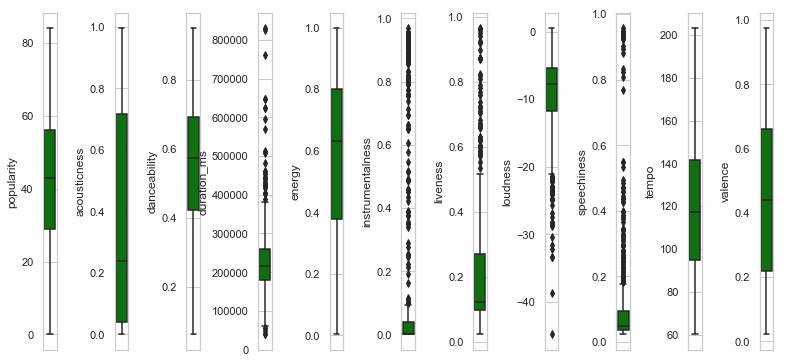

In [63]:
l = sample_data_num.columns.values
number_of_columns=11
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(sample_data_num[l[i]],color='green',orient='v')
    plt.tight_layout()

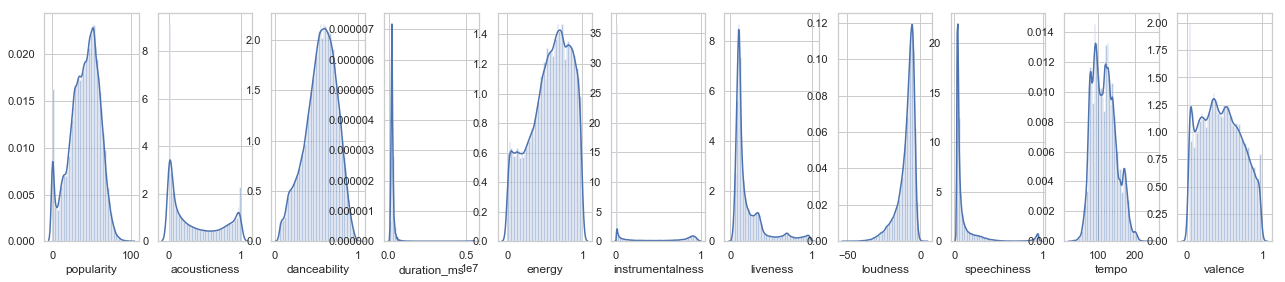

In [59]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

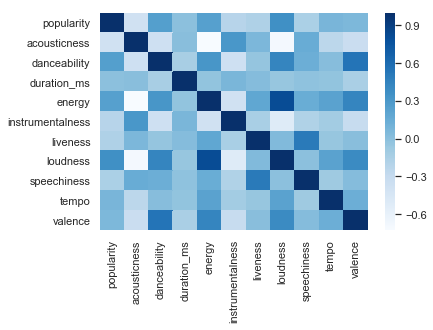

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

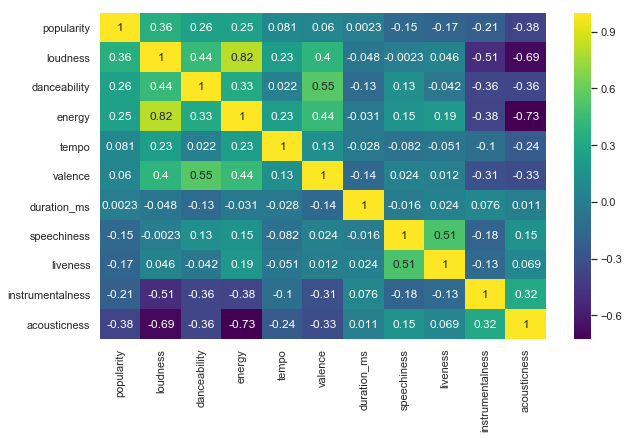

In [52]:
#Quality correlation matrix
k = 11 #number of variables for heatmap
cols = df.corr().nlargest(k, 'popularity')['popularity'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

##### Finding highly correlated features

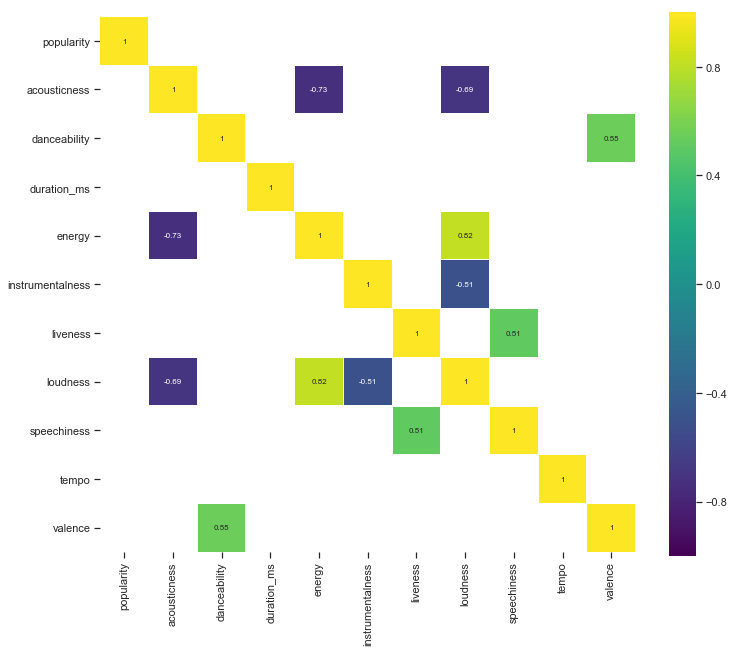

In [14]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

In [26]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print (high_corr_var)

[('energy', 'loudness')]


#### Creating a sample of the data to plot pairwise relationship



In [11]:
sample_data = df.sample(n = 500)

In [60]:
from scipy import stats
sample_data[(np.abs(stats.zscore(sample_data)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [19]:
sample_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
209384,World,United Pursuit,Heart Is My Home (Live),3VJ4Kv7dY5nk8E97XLr5t0,39,0.742,0.265,462186,0.2660,0.065100,A#,0.0642,-13.643,Major,0.0344,134.900,4/4,0.1650
81641,Opera,Maria Callas,"Lucia de Lammermoor - Acto I. ""Cruda, Funesta ...",08Xkd8GMKCwLRH217xeU6G,15,0.970,0.328,387024,0.5450,0.741000,C,0.6580,-9.563,Major,0.2400,145.715,4/4,0.3160
154274,Rock,Vance Joy,First Time,6OFKVE2HZdK3n2tbTDMhn3,54,0.313,0.639,224627,0.8940,0.000004,C,0.1680,-7.184,Major,0.1420,116.009,4/4,0.3900
197923,Soundtrack,John Williams,Secrets of the Castle,5PUvxyQ0STurZq4TM8yl4F,48,0.933,0.219,152147,0.0283,0.827000,D,0.1320,-29.830,Minor,0.0357,57.394,3/4,0.0828
105521,Opera,Engelbert Humperdinck,Act 2: Prelude to Act Two / The Witch's Ride -...,18ybV9Ryf0E3Jq1UceV7AE,3,0.886,0.199,263520,0.1540,0.934000,F,0.5610,-18.818,Major,0.0340,89.603,4/4,0.0698


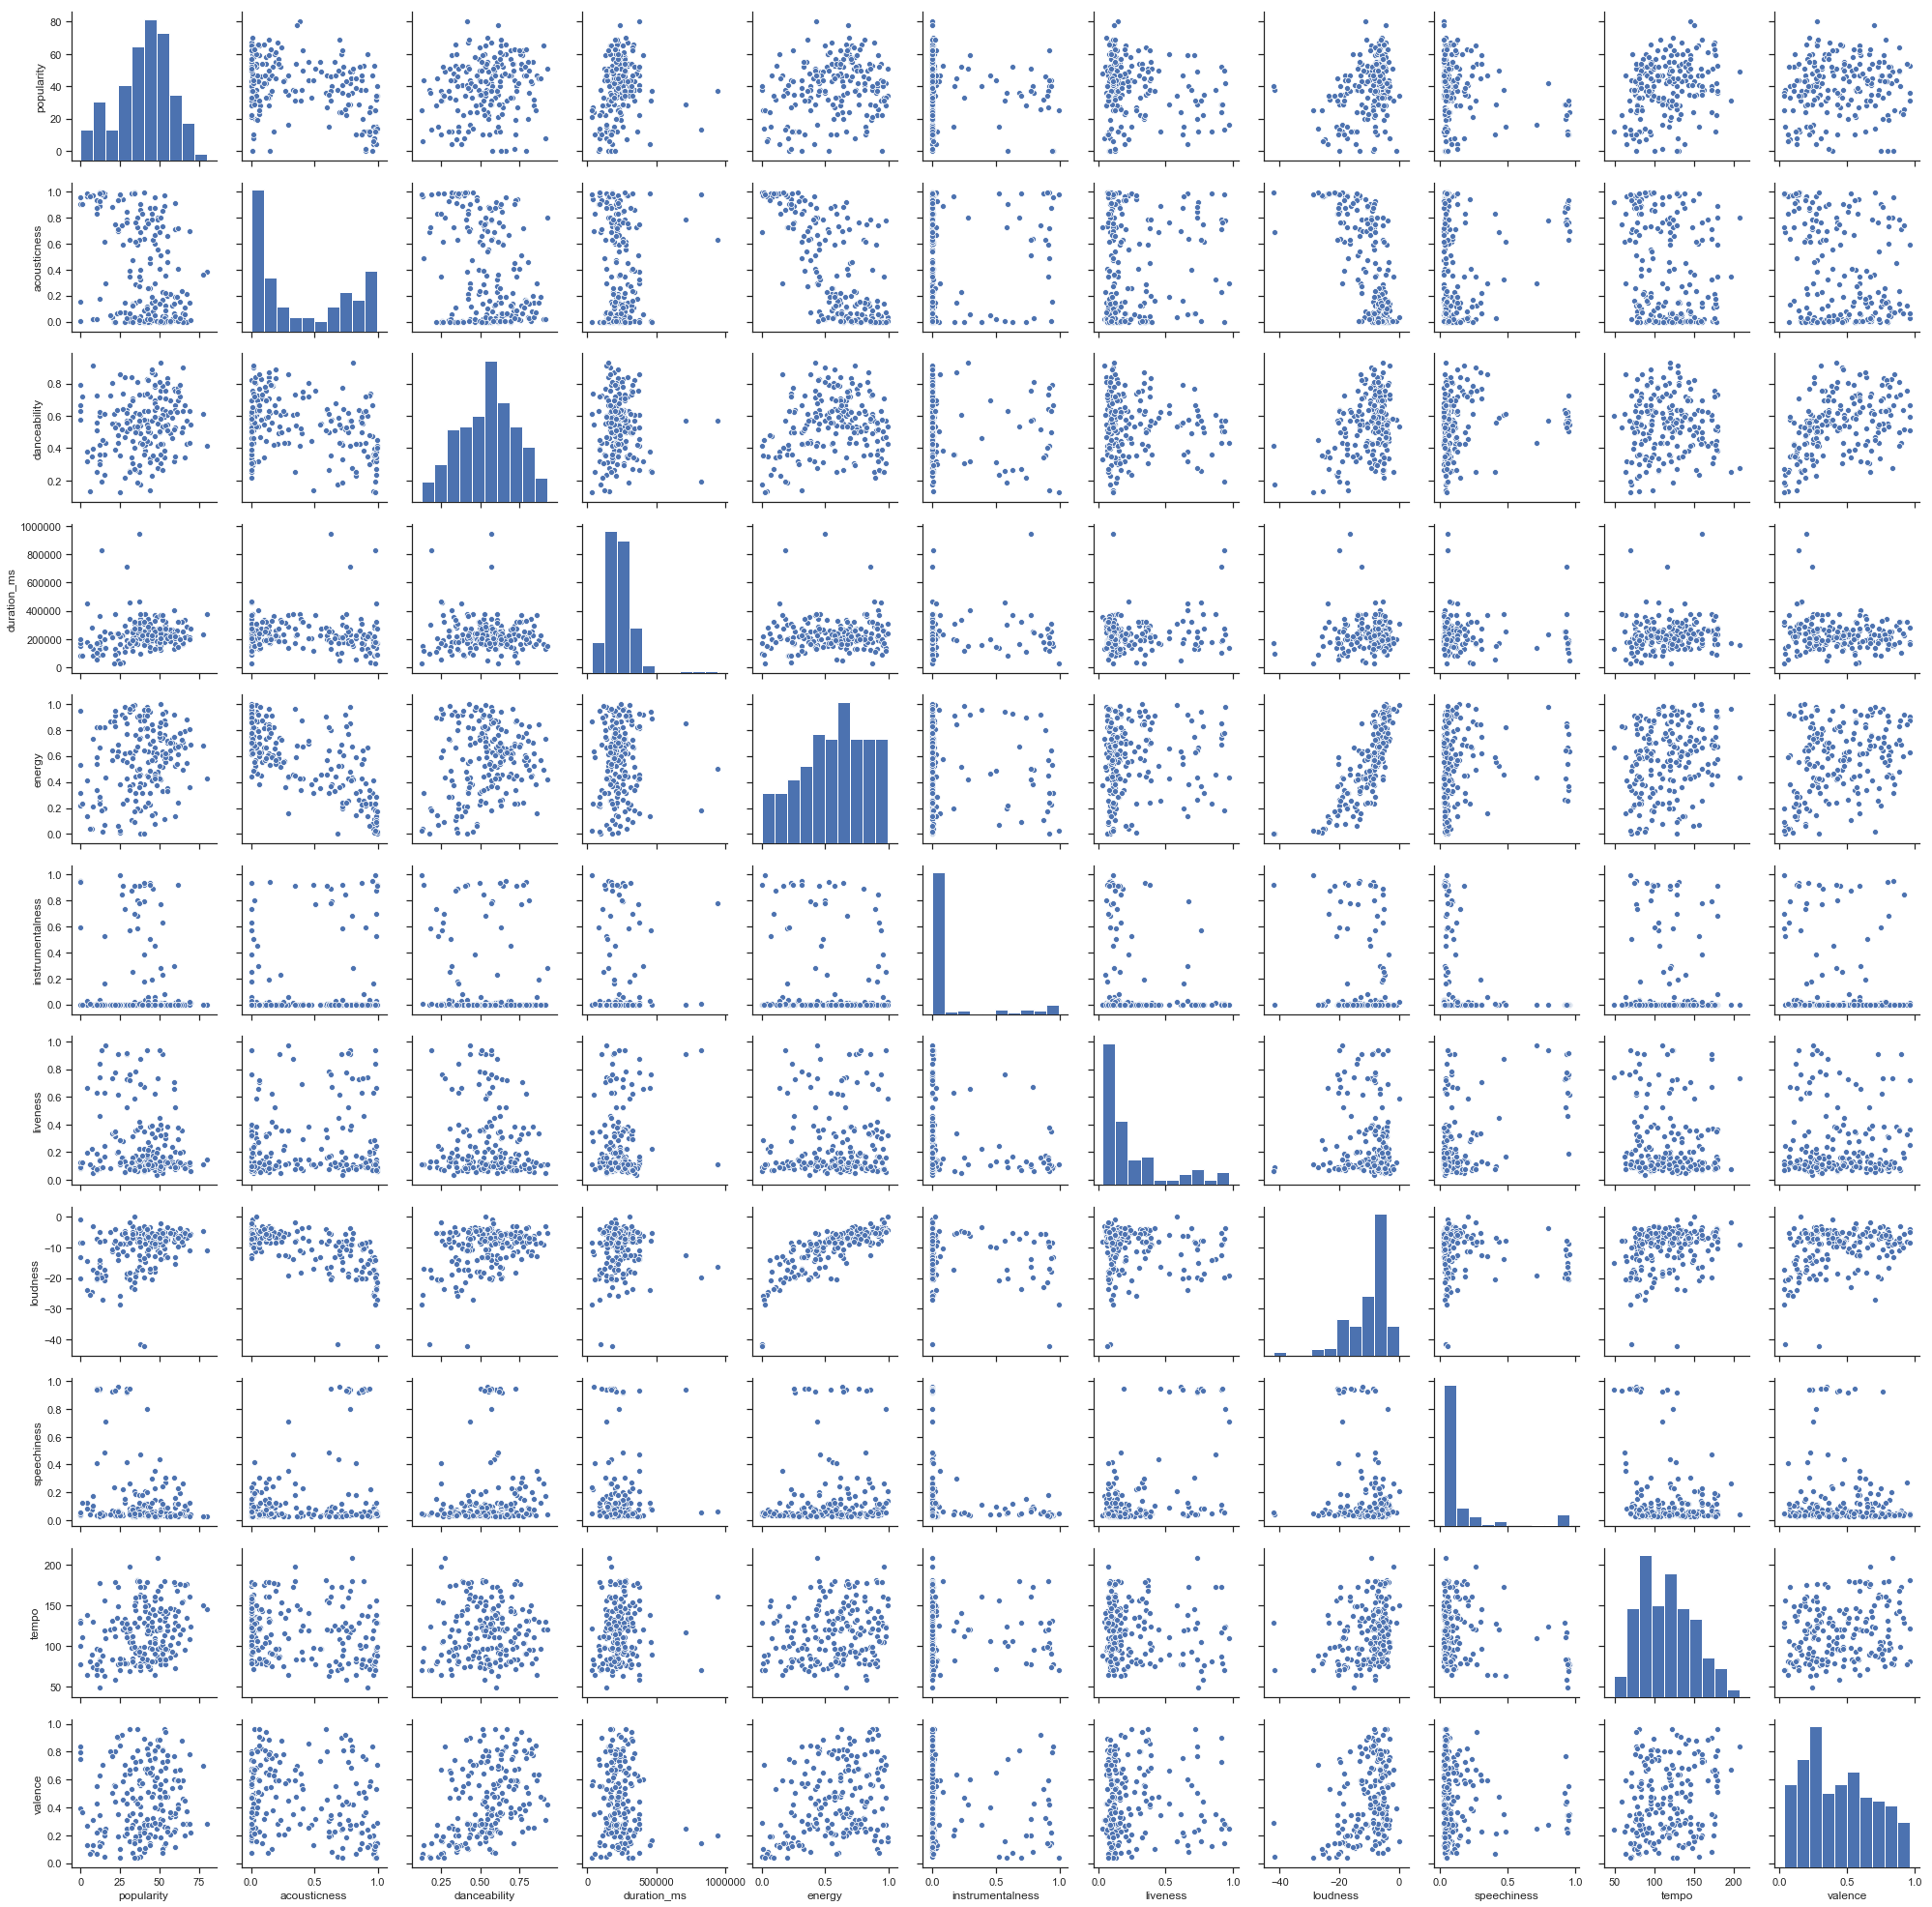

In [19]:
sns.pairplot(sample_data)

/Users/negar.shaghaghi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


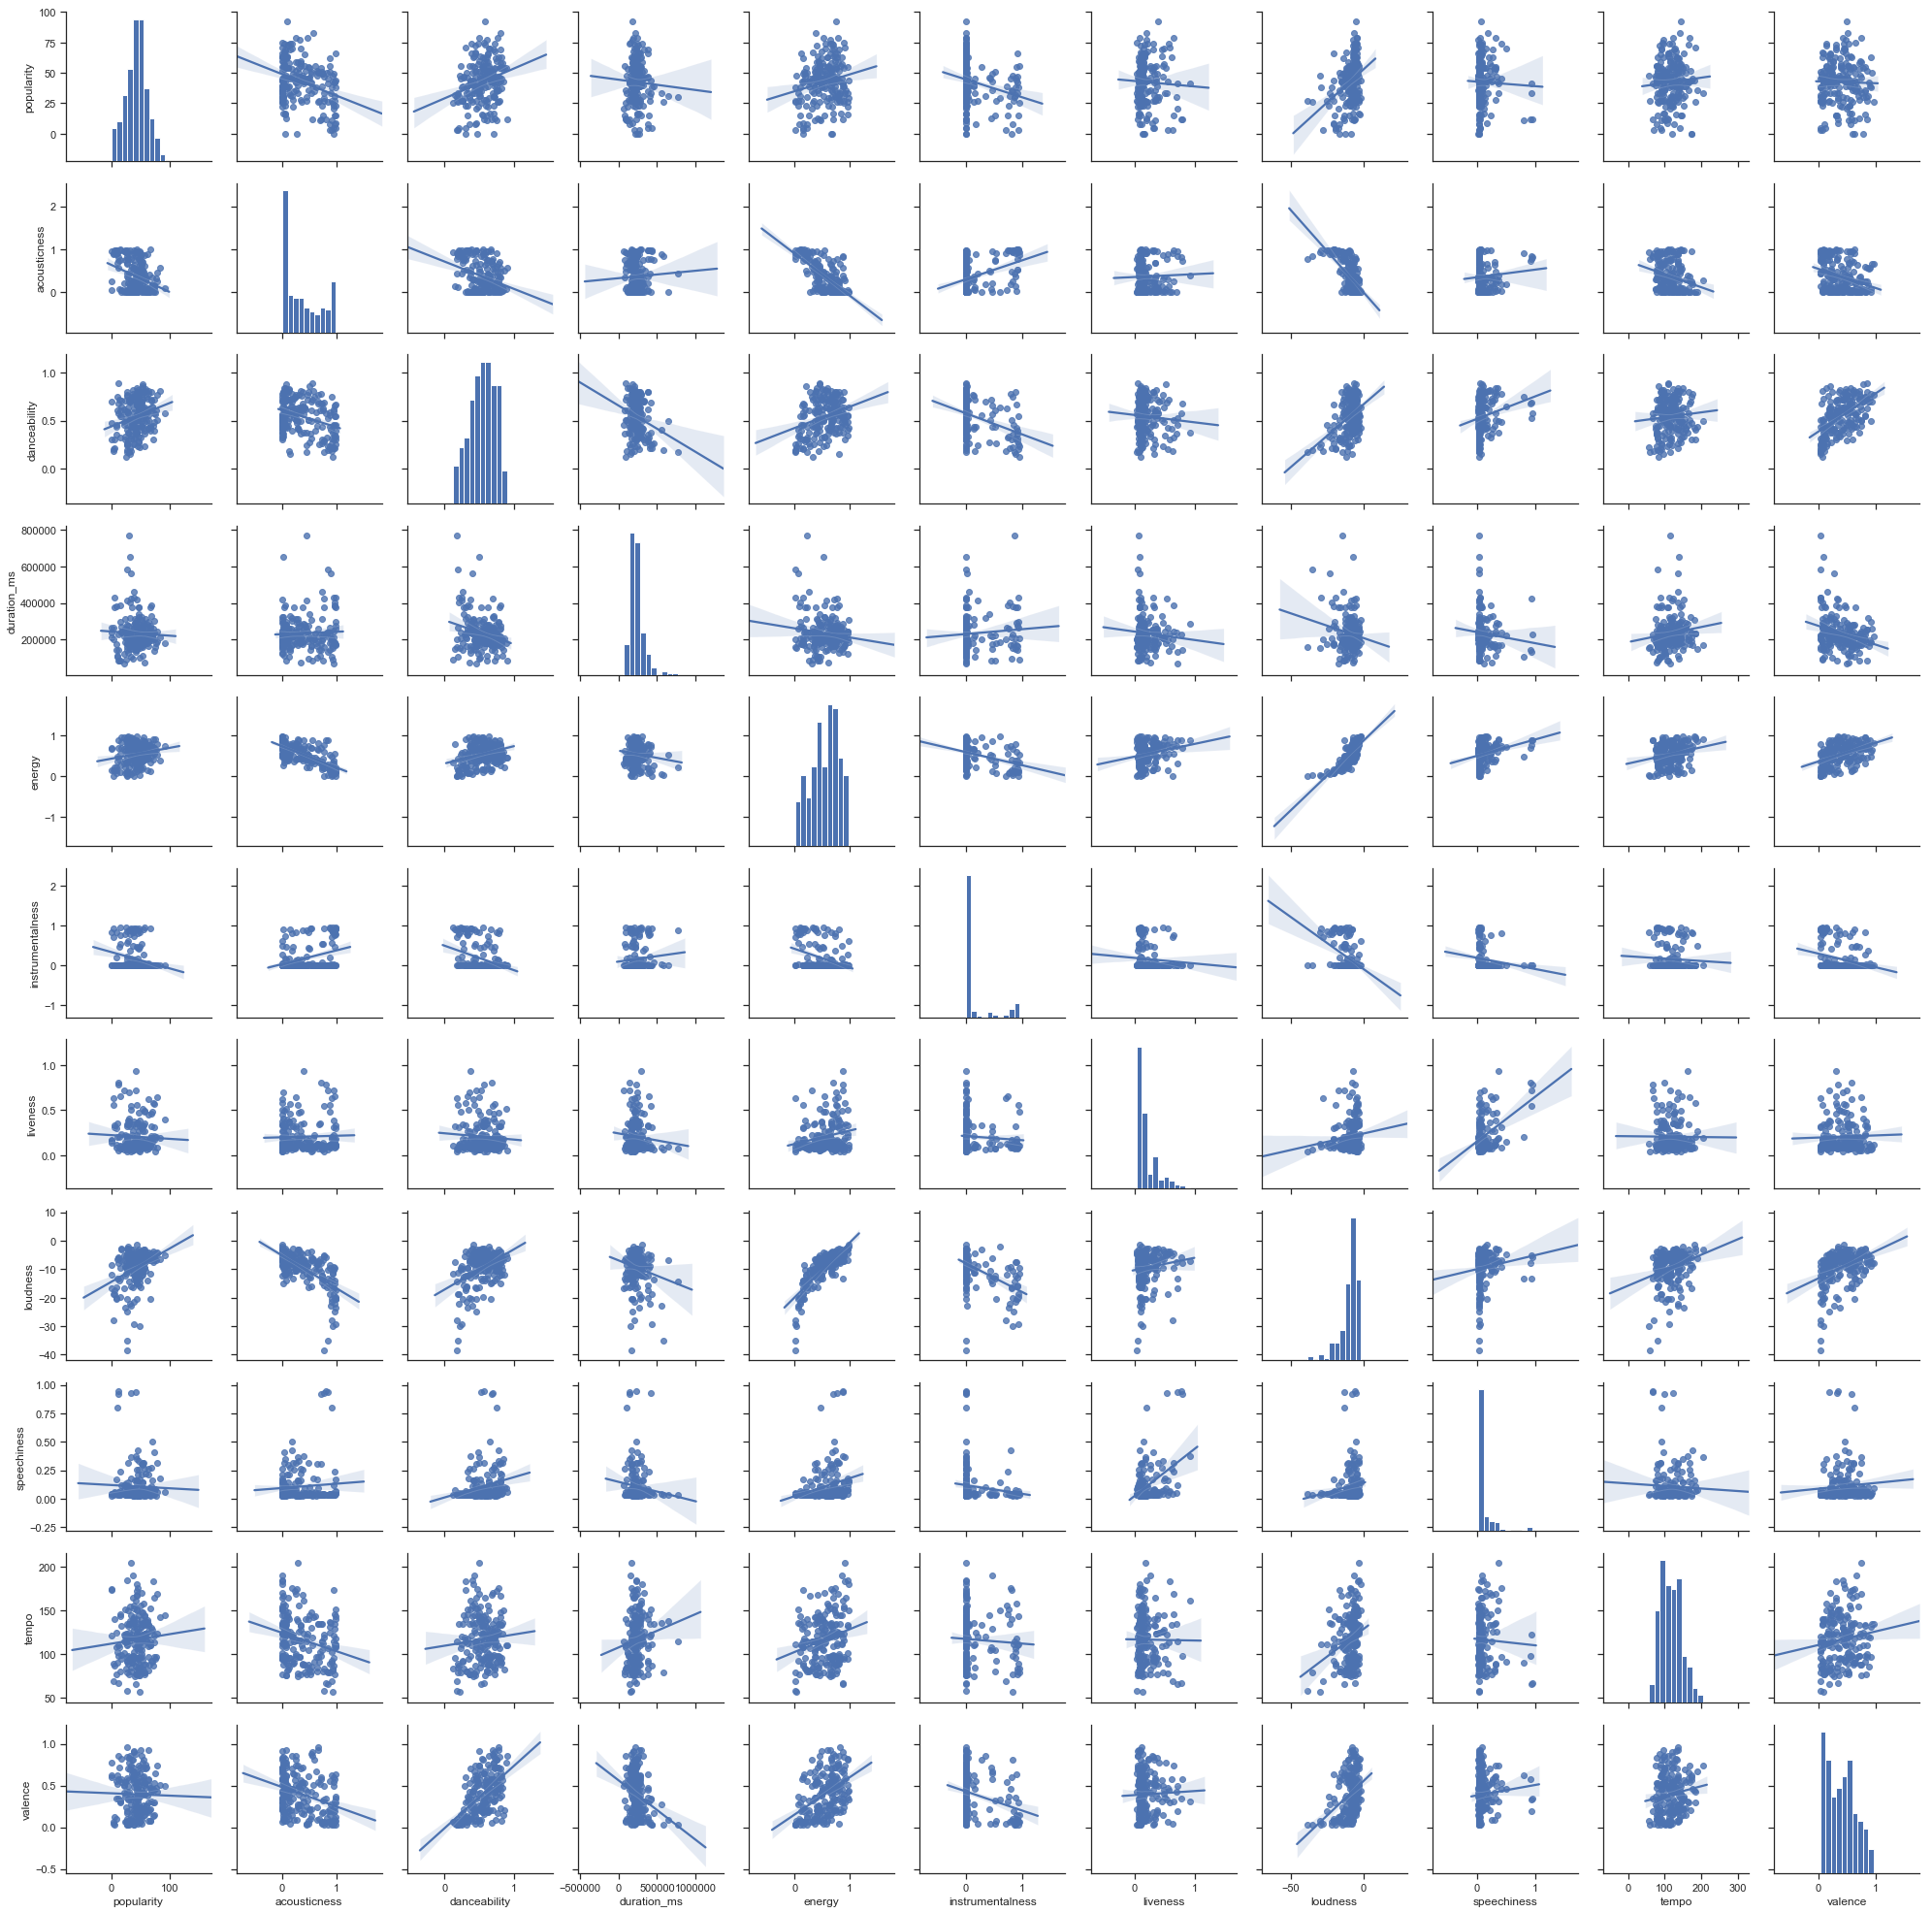

In [22]:
g = sns.pairplot(sample_data, kind="reg")

most popular tracks - reenforce finding.